In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../input/parkinsons-disease-speech-signal-features/pd_speech_features.csv')

In [4]:
df.shape

(756, 755)

In [34]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class,Status
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1,NaN
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1,1.0
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1,NaN
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1,1.0
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1,NaN


In [36]:
#df.isnull().sum().sum()

#there is no null values

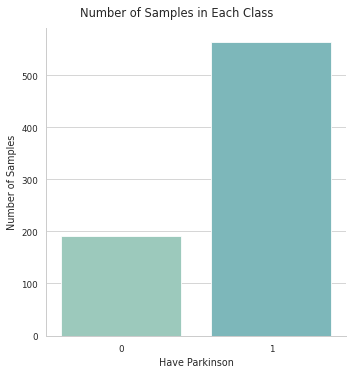

In [6]:
#count plot
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('GnBu_d')
a = sns.catplot(x='class', data=df, kind='count')
a.fig.suptitle('Number of Samples in Each Class', y=1.03)
a.set(ylabel='Number of Samples', xlabel='Have Parkinson')
plt.show()

-There is no correlated , duplicated and constant features in this data. So let's do some PCA. let's see any constant features values exists.

# PCA

In [ ]:
# PCA and tell us how many components are constant
pca = PCA().fit(df)
plt.figure(figsize=(10,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,754,1)
plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [7]:
x = df.drop('class',axis=1)
y= df['class']

import plotly.express as px
pca.fit(df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [9]:
df_copy = df.copy()

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_= scaler.fit_transform(df_copy)

In [11]:
df_scaled = pd.DataFrame(df_, columns=df.columns)

In [12]:
df_scaled.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0.000000,1.0,0.936278,0.565310,0.583000,0.262983,0.263274,0.548552,0.021947,0.071532,...,0.000219,0.005515,0.019054,0.024520,0.039777,0.039411,0.012611,0.018790,0.107598,1.0
1,0.000000,1.0,0.837434,0.489455,0.537514,0.256354,0.256637,0.566485,0.018001,0.063181,...,0.000206,0.010303,0.182833,0.123920,0.110245,0.109584,0.077525,0.078923,0.277905,1.0
2,0.000000,1.0,0.934385,0.428738,0.607479,0.254144,0.254425,0.573975,0.014344,0.056282,...,0.000229,0.003960,0.065964,0.089574,0.110145,0.044197,0.017594,0.021472,0.015595,1.0
3,0.003984,0.0,0.426804,0.819111,0.611315,0.194475,0.194690,0.805881,0.049580,0.144517,...,0.009530,0.010084,0.030618,0.122368,0.029052,0.042515,0.049618,0.077518,0.011011,1.0
4,0.003984,0.0,0.330615,0.822669,0.524431,0.258564,0.258850,0.557581,0.765643,0.186638,...,0.019569,0.021359,0.037492,0.039965,0.071521,0.139915,0.105554,0.055767,0.024357,1.0


# RESAMPLING

In [13]:
X = df_scaled.drop('class',axis=1)
Y= df_scaled['class']

In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_, y_ = smote.fit_resample(X,Y)

X, Y = pd.DataFrame(x,y_,)

# Model Building

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X_,y_, random_state=41, shuffle=True,stratify=y_)

In [ ]:
y_.value_counts()

In [16]:
pip install pycaret --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scattertext 0.1.4 requires gensim>=4.0.0, but you have gensim 3.8.3 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.3 which is incompatible.
matrixprofile 1.1.10 requires protobuf==3.11.2, but you have protobuf 3.18.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,recall_score,precision_score,cohen_kappa_score
from pycaret.classification import *

In [18]:
py = setup(data = df_scaled, target = 'class')

,Description,Value
0,session_id,8238
1,Target,class
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(756, 755)"
5,Missing Values,False
6,Numeric Features,753
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


Certain models are prevented for comparison because of their longer run-time. In order to bypass this prevention, the turbo parameter can be set to False.

In [19]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8979,0.9351,0.9802,0.8967,0.9364,0.6791,0.7004,1.5770
ada,Ada Boost Classifier,0.8827,0.9104,0.9458,0.9055,0.9251,0.6549,0.6595,0.7320
gbc,Gradient Boosting Classifier,0.8771,0.9114,0.9728,0.8808,0.9241,0.6024,0.6295,3.4660
et,Extra Trees Classifier,0.8771,0.9391,0.9827,0.8742,0.9249,0.5921,0.6281,0.3210
catboost,CatBoost Classifier,0.8771,0.9338,0.9851,0.8726,0.9250,0.5894,0.6311,91.7670
ridge,Ridge Classifier,0.8716,0.0000,0.9481,0.8926,0.9180,0.6123,0.6318,0.0190
rf,Random Forest Classifier,0.8695,0.9103,0.9704,0.8745,0.9197,0.5755,0.6003,0.5020
lr,Logistic Regression,0.8677,0.9128,0.9509,0.8860,0.9168,0.5945,0.6105,0.4510
xgboost,Extreme Gradient Boosting,0.8639,0.9154,0.9604,0.8746,0.9151,0.5724,0.5945,11.4530
knn,K Neighbors Classifier,0.8525,0.9077,0.9383,0.8790,0.9070,0.5490,0.5634,0.0970


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8238, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [20]:
#sort it using the metrics.
compare_models(n_select = 3, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8979,0.9351,0.9802,0.8967,0.9364,0.6791,0.7004,1.6530
ada,Ada Boost Classifier,0.8827,0.9104,0.9458,0.9055,0.9251,0.6549,0.6595,0.7290
catboost,CatBoost Classifier,0.8771,0.9338,0.9851,0.8726,0.9250,0.5894,0.6311,93.8730
et,Extra Trees Classifier,0.8771,0.9391,0.9827,0.8742,0.9249,0.5921,0.6281,0.3240
gbc,Gradient Boosting Classifier,0.8771,0.9114,0.9728,0.8808,0.9241,0.6024,0.6295,3.4570
rf,Random Forest Classifier,0.8695,0.9103,0.9704,0.8745,0.9197,0.5755,0.6003,0.5120
ridge,Ridge Classifier,0.8716,0.0000,0.9481,0.8926,0.9180,0.6123,0.6318,0.0290
lr,Logistic Regression,0.8677,0.9128,0.9509,0.8860,0.9168,0.5945,0.6105,0.3360
xgboost,Extreme Gradient Boosting,0.8639,0.9154,0.9604,0.8746,0.9151,0.5724,0.5945,11.6740
knn,K Neighbors Classifier,0.8525,0.9077,0.9383,0.8790,0.9070,0.5490,0.5634,0.0990


[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=8238, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=8238),

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ attribute is deprecated in version 0.22 and will be removed in version 0.24. It is equivalent to n_outputs_ > 1.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ attribute is deprecated in version 0.22 and will be removed in version 0.24. It is equivalent to n_outputs_ > 1.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d

The “create_model” function takes in just the model ID as a string and performs the task.

In [21]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8491,0.8984,0.9756,0.8511,0.9091,0.4765,0.5181
1,0.8679,0.9024,0.9512,0.8864,0.9176,0.5864,0.5958
2,0.9623,0.9268,1.0000,0.9535,0.9762,0.8855,0.8914
3,0.9057,0.9593,0.9756,0.9091,0.9412,0.7046,0.7159
4,0.9057,0.9533,1.0000,0.8913,0.9425,0.6841,0.7211
5,0.8679,0.9126,0.9512,0.8864,0.9176,0.5864,0.5958
6,0.7170,0.8250,0.8250,0.8049,0.8148,0.2152,0.2155
7,0.8302,0.9346,0.9750,0.8298,0.8966,0.4395,0.4883
8,0.8679,0.8981,0.9750,0.8667,0.9176,0.5901,0.6171


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8302,0.8272,0.9756,0.8333,0.8989,0.3892,0.4423
1,0.8302,0.7805,0.9512,0.8478,0.8966,0.4315,0.4547
2,0.9245,0.9533,0.9756,0.9302,0.9524,0.7711,0.7762
3,0.9245,0.9329,1.0000,0.9111,0.9535,0.7558,0.7794
4,0.8491,0.9045,1.0000,0.8367,0.9111,0.4362,0.5281
5,0.8491,0.8862,0.9756,0.8511,0.9091,0.4765,0.5181
6,0.7925,0.7981,0.9250,0.8222,0.8706,0.3558,0.3721
7,0.8302,0.9212,0.9750,0.8298,0.8966,0.4395,0.4883
8,0.8868,0.8788,0.9750,0.8864,0.9286,0.6588,0.6765


2022-08-28 05:44:16.801436: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-08-28 05:44:16.802293: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


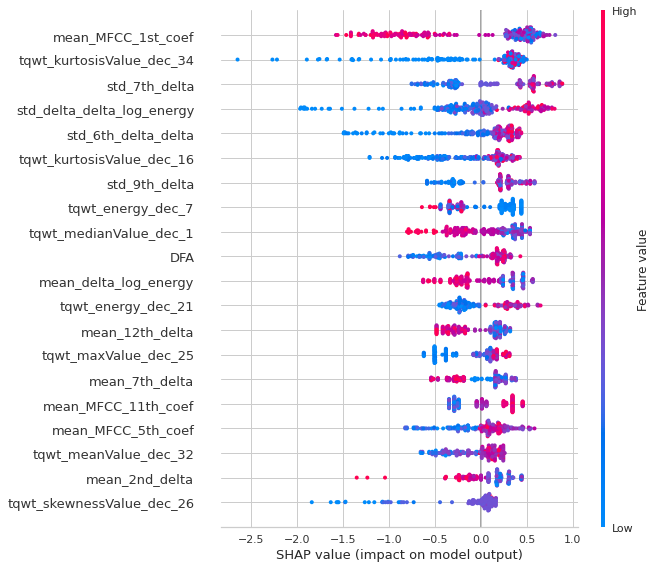

In [22]:
tuned_xg = tune_model(xgboost)
interpret_model(tuned_xg)

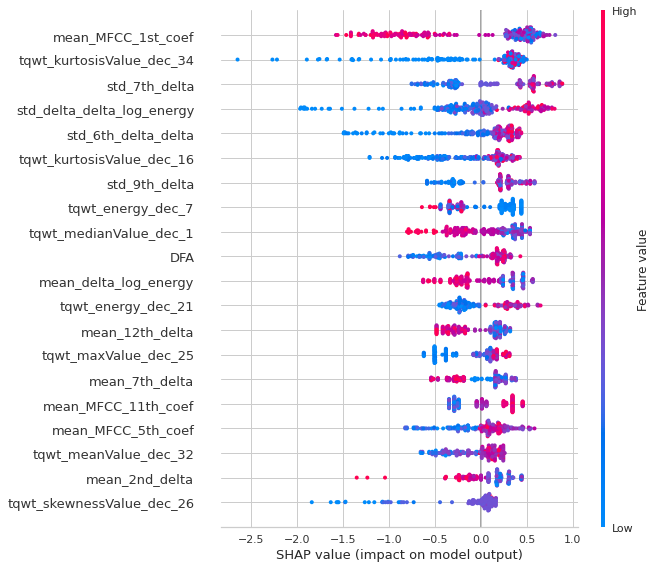

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

In [23]:
interpret_model(tuned_xg)

In [24]:
predict_model(tuned_xg)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8018,0.8646,0.9620,0.7958,0.8711,0.4586,0.4996


,id,PPE,DFA,RPDE,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,ppq5Jitter,...,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,gender_1.0,class,Label,Score
0,0.035857,0.922377,0.196901,0.341163,0.363938,0.343584,0.013047,0.043210,0.029219,0.026273,...,0.015943,0.016635,0.043348,0.109747,0.066138,0.237696,1.0,1.0,1.0,0.9993
1,0.450199,0.493828,0.658181,0.869081,0.182522,0.720187,0.118331,0.289034,0.314370,0.269841,...,0.111509,0.185641,0.077953,0.036959,0.105813,0.214311,0.0,1.0,1.0,0.9998
2,0.286853,0.825472,1.000000,0.426011,0.276549,0.511050,0.031319,0.138707,0.118118,0.116585,...,0.009230,0.015303,0.045949,0.039047,0.022327,0.005158,1.0,1.0,1.0,1.0000
3,0.952191,0.759707,0.576017,0.820066,0.222345,0.681581,0.040561,0.157226,0.165813,0.162014,...,0.447218,0.624905,0.658366,0.695792,0.618235,0.501493,1.0,1.0,1.0,0.9999
4,0.936255,0.935770,0.430161,0.346184,0.462389,0.229023,0.007777,0.023602,0.012760,0.013136,...,0.036839,0.049756,0.067994,0.066076,0.087882,0.054164,0.0,0.0,1.0,0.6837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.597610,0.850400,0.361066,0.629322,0.280973,0.498956,0.033158,0.084604,0.071988,0.080460,...,0.008431,0.009176,0.013193,0.004504,0.013879,0.040728,1.0,1.0,0.0,0.5650
223,0.015936,0.888952,0.727211,0.772446,0.335177,0.387654,0.931677,0.116195,0.081761,0.074439,...,0.004443,0.009377,0.015227,0.040713,0.056058,0.320158,0.0,1.0,1.0,0.9999
224,0.653386,0.906513,0.467038,0.549649,0.264381,0.544609,0.019240,0.063181,0.058305,0.049261,...,1.000000,1.000000,0.994187,0.989555,0.895878,0.605335,1.0,1.0,1.0,0.9930
225,0.944223,0.975719,0.224720,0.251545,0.513274,0.187346,0.005242,0.011619,0.005841,0.008210,...,0.016709,0.022163,0.034766,0.060048,0.103739,0.015004,0.0,0.0,0.0,0.9921


In [25]:
predictions = predict_model(tuned_xg, data = X_test)

In [26]:
df['Status'] = predictions['Label']

In [28]:
new_ = df['Status']

In [32]:
new.head()

1     1.0
3     1.0
5     1.0
12    1.0
14    1.0
Name: Status, dtype: object

In [33]:
new

1      1.0
3      1.0
5      1.0
12     1.0
14     1.0
      ... 
734    0.0
735    1.0
742    1.0
750    0.0
753    0.0
Name: Status, Length: 195, dtype: object